**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [4]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [129]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):

    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [193]:
x = np.arange(10, 101, 10)
y = line(2, x, 0, errors(x))

Text(0,0.5,'endogenous')

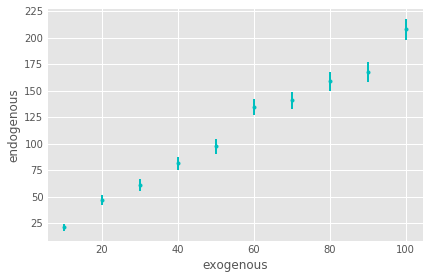

In [194]:
pl.style.use('ggplot')
pl.errorbar(x,y, yerr=errors(x), marker='.', linestyle='', linewidth=2, color='c')
pl.xlabel('exogenous')
pl.ylabel('endogenous')

# Figure 1: Plot w/ Error Bars

*A plot of arbitrary exogenous variables with a slope of 2 and randomly generated error values.*

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [195]:
print('y: ', y)
print('x: ', x)
print('constant:\n', sm.add_constant(x))

y:  [  20.93444254   46.88898678   60.63012386   81.25981187   97.55171134
  134.59820436  140.72562411  158.99738188  167.23818489  207.98941381]
x:  [ 10  20  30  40  50  60  70  80  90 100]
constant:
 [[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [196]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2881.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.36e-12
Time:                        21:55:24   Log-Likelihood:                -33.634
No. Observations:                  10   AIC:                             69.27
Df Residuals:                       9   BIC:                             69.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.0153      0.038     53.670      0.000         1.930     2.100
==============================================================================
Omnibus:                        1.980   Durbin-Watson:                   2.337
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                0.226
Skew:                          -0.292   Prob(JB):                        0.893
Kurtosis:                       3.449   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
#THE RIGHT WAY
smfitCon = smf.OLS(y, sm.add_constant(x)).fit()
smfitCon.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     555.9
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.11e-08
Time:                        21:55:26   Log-Likelihood:                -33.287
No. Observations:                  10   AIC:                             70.57
Df Residuals:                       8   BIC:                             71.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.9074      5.157      0.758      0.470        -7.984    15.799
x1             1.9595      0.083     23.578      0.000         1.768     2.151
==============================================================================
Omnibus:                        0.947   Durbin-Watson:                   2.525
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                0.050
Skew:                           0.171   Prob(JB):                        0.975
Kurtosis:                       3.052   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Running the OLS regression using a constant returns a slightly lower R-squared value. This sacrifices the model's short-term precision in exchange for long-term accuracy.*

# 4. plot the data (as points) and both statsmodels fits

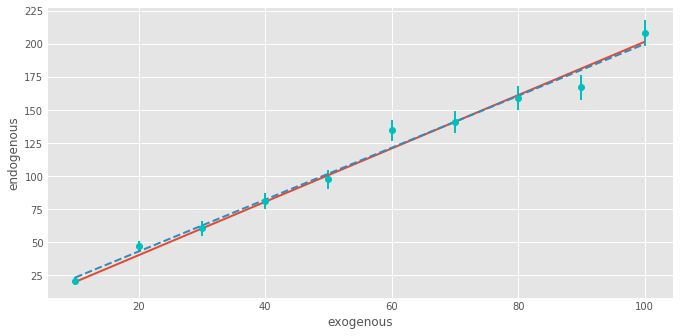

In [204]:
pl.style.use('ggplot')

fig, ax = pl.subplots(figsize=(10,5))
ax.errorbar(x,y, yerr=errors(x), marker='o', linestyle='', linewidth=2, color='c')
ax.plot(x, x * smfit.params[0], linewidth=2)
ax.plot(x, x * smfitCon.params[1] + smfitCon.params[0], linewidth=2, linestyle='--')

ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')

pl.show()

# Figure 2: Comparison of OLS With and Without a Constant

*OLS without a constant produces a slightly better fitting line.*

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0,0.5,'endogenous')

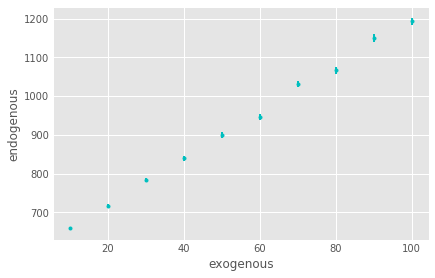

In [206]:
x = np.arange(10, 101, 10)
y = line(6, x, 600, errors(x))
pl.errorbar(x,y, yerr=errors(x), marker='.', linestyle='', linewidth=2, color='c')
pl.xlabel('exogenous')
pl.ylabel('endogenous')

# Figure 3: Uncertainties with Large Intercept

*With an intercept that is at least 100 times the slope, uncertainties appear much smaller than in the original plot.*

# 6. repeat step 3

In [189]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     94.91
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.44e-06
Time:                        21:52:05   Log-Likelihood:                -70.470
No. Observations:                  10   AIC:                             142.9
Df Residuals:                       9   BIC:                             143.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            14.5561      1.494      9.742      0.000        11.176    17.936
==============================================================================
Omnibus:                        0.967   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.622
Skew:                           0.012   Prob(JB):                        0.733
Kurtosis:                       1.778   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
#THE RIGHT WAY
smfitCon = smf.OLS(y, sm.add_constant(x)).fit()
smfitCon.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.141e+04
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.60e-14
Time:                        21:52:26   Log-Likelihood:                -29.329
No. Observations:                  10   AIC:                             62.66
Df Residuals:                       8   BIC:                             63.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        600.7288      3.471    173.065      0.000       592.724   608.733
x1             5.9743      0.056    106.794      0.000         5.845     6.103
==============================================================================
Omnibus:                        0.345   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.841   Jarque-Bera (JB):                0.441
Skew:                          -0.057   Prob(JB):                        0.802
Kurtosis:                       1.977   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [208]:
wls = smf.WLS(y,x, weights= 1 / errors(x)).fit()
wls.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.864
Model:                            WLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     57.39
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.41e-05
Time:                        22:06:23   Log-Likelihood:                -72.376
No. Observations:                  10   AIC:                             146.8
Df Residuals:                       9   BIC:                             147.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            15.4227      2.036      7.576      0.000        10.817    20.028
==============================================================================
Omnibus:                        0.840   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.693
Skew:                           0.507   Prob(JB):                        0.707
Kurtosis:                       2.202   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

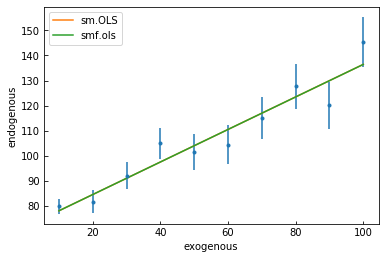

In [39]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();